In this notebook we will assume that the systems that produce a GW merger are ones in which they survive an ejected CE and then merge due to GW (the double degenerate case)

We will select for systems in teh BSE_Common_Envelope where Optimistic_CE = False and Merger = False

We will add these systems to a BSE_Double_Compact_Objects group to then run fastcosmicintegration on

Depending on how many systems agree with these conditons we will turn the pessimistic and rlof flags back to false in fast cosmic integration


In [1]:
#importing, make sure the kernel is correct or the module will be unknown
import h5py as h5
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from useful_fncs import tgw,WD_BINARY_BOOLS,WDWD_bools,separations

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
# reading in the HDF5 file
pathToAIS_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_wWeights_SM.h5' #path of the hdf5 file

Data_AIS = h5.File(pathToAIS_H5)

# let's gather the system parameters group 

SP_WD_AIS = pd.DataFrame() # making a pandas dataframe

for key in Data_AIS["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_AIS[key] = Data_AIS["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [3]:
CE = Data_AIS['BSE_Common_Envelopes']
CE.keys()

# we can calulate the coalescence time and get a lifetime and separation distirbutions form this group
# only WD that eject their CE can experience GW merger


<KeysViewHDF5 ['BE_Fixed(1)', 'BE_Fixed(2)', 'BE_Kruckow(1)', 'BE_Kruckow(2)', 'BE_Loveridge(1)', 'BE_Loveridge(2)', 'BE_Loveridge_Winds(1)', 'BE_Loveridge_Winds(2)', 'BE_Nanjing(1)', 'BE_Nanjing(2)', 'Binding_Energy<CE(1)', 'Binding_Energy<CE(2)', 'CE_Event_Counter', 'Double_Core_CE', 'Eccentricity<CE', 'Eccentricity>CE', 'Immediate_RLOF>CE', 'Lambda@CE(1)', 'Lambda@CE(2)', 'Lambda_Fixed(1)', 'Lambda_Fixed(2)', 'Lambda_Kruckow(1)', 'Lambda_Kruckow(2)', 'Lambda_Loveridge(1)', 'Lambda_Loveridge(2)', 'Lambda_Loveridge_Winds(1)', 'Lambda_Loveridge_Winds(2)', 'Lambda_Nanjing(1)', 'Lambda_Nanjing(2)', 'Luminosity<CE(1)', 'Luminosity<CE(2)', 'MT_History', 'Mass(1)<CE', 'Mass(1)>CE', 'Mass(2)<CE', 'Mass(2)>CE', 'Mass_Env(1)', 'Mass_Env(2)', 'Merger', 'Metallicity@ZAMS(1)', 'Optimistic_CE', 'RLOF(1)', 'RLOF(2)', 'Radius(1)<CE', 'Radius(1)>CE', 'Radius(2)<CE', 'Radius(2)>CE', 'Record_Type', 'RocheLobe(1)<CE', 'RocheLobe(1)>CE', 'RocheLobe(2)<CE', 'RocheLobe(2)>CE', 'SEED', 'SemiMajorAxis<CE', '

In [5]:
# selecting for just BWD and checking to make sure that is what we got

WDWD_SYS_AIS_BOOL = WDWD_bools(SP_WD_AIS,'Stellar_Type(1)','Stellar_Type(2)')
WDWD_AIS_SYS = SP_WD_AIS[WDWD_SYS_AIS_BOOL]
# WDWD_SYS_AIS_TABLE
print(np.unique(WDWD_AIS_SYS['Stellar_Type(1)']))
print(np.unique(WDWD_AIS_SYS['Stellar_Type(2)']))

[10 11 12]
[10 11 12]


10.136720567156408


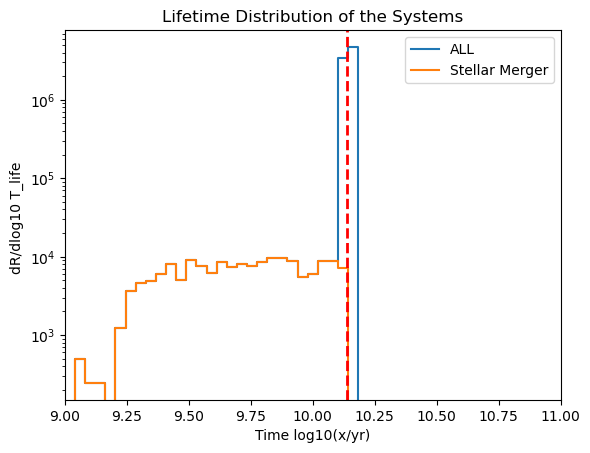

In [6]:
# first let's just look at the lifetime disitbutions
time_log_yr = np.log10(WDWD_AIS_SYS['Time'] *1e6  )

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(time_log_yr, weights=WDWD_AIS_SYS['mixture_weight'], bins = np.linspace(9, 11, 50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.step(center_bins,hist/bin_width,where='mid',label='ALL')


stellar_merger_wdwd = WDWD_AIS_SYS.loc[WDWD_AIS_SYS['Merger']==True]
stellar_merger_time_log_yr = np.log10(stellar_merger_wdwd['Time'] *1e6  )

hist, bin_edges = np.histogram(stellar_merger_time_log_yr, weights=stellar_merger_wdwd['mixture_weight'], bins = np.linspace(9, 11, 50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.step(center_bins,hist/bin_width,where='mid',label='Stellar Merger')

###### 
#plotvalues
plt.xlabel("Time log10(x/yr)")
plt.yscale('log')

plt.ylabel("dR/dlog10 T_life ")
plt.title("Lifetime Distribution of the Systems")

# # the age of the universe
age_universe = (13.7 * 1e9) # converting from yr to Myr
print(np.log10(13.7 *1e9) )
plt.xlim(9, 11)
plt.axvline(np.log10(age_universe), color='r', linestyle='--', linewidth=2)
plt.legend()


In [ ]:
lifetime_bool = WDWD_SYS_AIS_TABLE['Time'] > age_universe
print(sum(lifetime_bool))

In [12]:
# taking the CE falg

ce_bool = WDWD_AIS_SYS['CE_Event_Counter']>0
sm_not_true = WDWD_AIS_SYS['Merger']==False

print(sum(ce_bool*sm_not_true)) # systems that experience a CE but are not Stellar merger

print(min(WDWD_AIS_SYS["Mass(1)"][ce_bool*sm_not_true]))
print(max(WDWD_AIS_SYS["Mass(1)"][ce_bool*sm_not_true]))

print(min(WDWD_AIS_SYS["Mass(2)"][ce_bool*sm_not_true]))
print(max(WDWD_AIS_SYS["Mass(2)"][ce_bool*sm_not_true]))

84798
0.09474842290206931
1.7556418126383084
0.07720048145814043
1.3800601152152883


In [ ]:
# check the separation after ejection of CE



These systems seems to have a broad range of masses, including higgher masses. The higher masses should have lifetimes that less than the age of the universe. Lieke suspects that the time COMPAS is printing is the time it takes to form a DCO and then evolve after the age of the universe but it is just forming two white dwarfs and letting them "evolve" live for as long as the simulation runs for (the age of the universe) and then adds that to the time (so it is making the time much longer than it should be)

10.136720567156408


/tmp/ipykernel_1378417/3921317203.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stellar_merger_wdwd = WDWD_AIS_SYS.loc[WDWD_AIS_SYS['Merger']==True][bool]


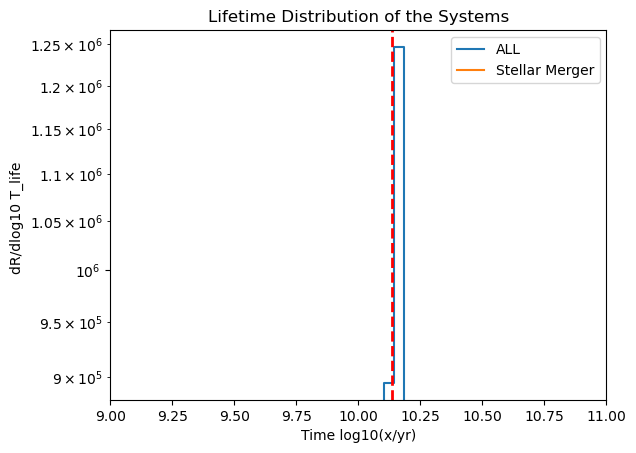

In [10]:
bool = ce_bool*sm_not_true
# first let's just look at the lifetime disitbutions
time_log_yr = np.log10(WDWD_AIS_SYS['Time'][bool] *1e6  )

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(time_log_yr, weights=WDWD_AIS_SYS['mixture_weight'][bool], bins = np.linspace(9, 11, 50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.step(center_bins,hist/bin_width,where='mid',label='ALL')


stellar_merger_wdwd = WDWD_AIS_SYS.loc[WDWD_AIS_SYS['Merger']==True][bool]
stellar_merger_time_log_yr = np.log10(stellar_merger_wdwd['Time'] *1e6  )

hist, bin_edges = np.histogram(stellar_merger_time_log_yr, weights=stellar_merger_wdwd['mixture_weight'][bool], bins = np.linspace(9, 11, 50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.step(center_bins,hist/bin_width,where='mid',label='Stellar Merger')

###### 
#plotvalues
plt.xlabel("Time log10(x/yr)")
plt.yscale('log')

plt.ylabel("dR/dlog10 T_life ")
plt.title("Lifetime Distribution of the Systems")

# # the age of the universe
age_universe = (13.7 * 1e9) # converting from yr to Myr
print(np.log10(13.7 *1e9) )
plt.xlim(9, 11)
plt.axvline(np.log10(age_universe), color='r', linestyle='--', linewidth=2)
plt.legend()
